In [529]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
pd.set_option('max_columns', 150)

In [2]:
ds = pd.read_csv("C:/Users/tvpia/Desktop/Final project/final-project/your-project/Datasets/ds_explore.csv")

In [3]:
ds.head(5)

,Unnamed: 0,HSNS1,HSNS2,HSNS3,HSNS4,HSNS5,HSNS6,HSNS7,HSNS8,HSNS9,HSNS10,DDP1,DDP2,DDP3,DDP4,DDN1,DDN2,DDN3,DDN4,DDM1,DDM2,DDM3,DDM4,age,gender,accuracy,country,HSNScale,HSNS1_flag,HSNS2_flag,HSNS3_flag,HSNS4_flag,HSNS5_flag,HSNS6_flag,HSNS7_flag,HSNS8_flag,HSNS9_flag,HSNS10_flag,DDP1_flag,DDP2_flag,DDP3_flag,DDP4_flag,DDN1_flag,DDN2_flag,DDN3_flag,DDN4_flag,DDM1_flag,DDM2_flag,DDM3_flag,DDM4_flag,label_psy_only,label_all_features
0,0,2,4,5,1,4,5,4,3,3,2,1,1,4,4,2,1,1,1,1,2,2,1,37,2,98,PT,0.62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2
1,1,4,2,2,4,3,4,4,5,4,3,4,4,2,4,3,2,2,3,4,4,4,3,34,3,95,PL,0.64,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2,5,5,5,4,2,5,5,4,4,2,2,2,2,4,4,2,4,3,3,4,4,2,22,2,80,AU,0.78,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0
3,3,4,1,2,2,4,5,2,2,5,2,4,2,4,0,5,5,4,1,4,2,3,4,24,1,99,US,0.54,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,4,5,3,4,5,5,5,4,5,4,3,4,3,4,4,4,2,5,2,4,4,1,5,21,2,90,US,0.80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4


Quick pre-exploration cleaning : remove unnamed colum, add the test results for the 3 tests included in the dirty triad test and remove the flagged columns.

In [4]:
ds.drop(columns="Unnamed: 0",inplace=True)

In [5]:
ds["DDPScale"]= round(ds.iloc[:,10:14].sum(axis=1)*5/100,2)
ds["DDNScale"]= round(ds.iloc[:,14:18].sum(axis=1)*5/100,2)
ds["DDMScale"]= round(ds.iloc[:,18:22].sum(axis=1)*5/100,2)

In [6]:
ds.head(5)

,HSNS1,HSNS2,HSNS3,HSNS4,HSNS5,HSNS6,HSNS7,HSNS8,HSNS9,HSNS10,DDP1,DDP2,DDP3,DDP4,DDN1,DDN2,DDN3,DDN4,DDM1,DDM2,DDM3,DDM4,age,gender,accuracy,country,HSNScale,HSNS1_flag,HSNS2_flag,HSNS3_flag,HSNS4_flag,HSNS5_flag,HSNS6_flag,HSNS7_flag,HSNS8_flag,HSNS9_flag,HSNS10_flag,DDP1_flag,DDP2_flag,DDP3_flag,DDP4_flag,DDN1_flag,DDN2_flag,DDN3_flag,DDN4_flag,DDM1_flag,DDM2_flag,DDM3_flag,DDM4_flag,label_psy_only,label_all_features,DDPScale,DDNScale,DDMScale
0,2,4,5,1,4,5,4,3,3,2,1,1,4,4,2,1,1,1,1,2,2,1,37,2,98,PT,0.62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.50,0.25,0.30
1,4,2,2,4,3,4,4,5,4,3,4,4,2,4,3,2,2,3,4,4,4,3,34,3,95,PL,0.64,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.70,0.50,0.75
2,5,5,5,4,2,5,5,4,4,2,2,2,2,4,4,2,4,3,3,4,4,2,22,2,80,AU,0.78,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0.50,0.65,0.65
3,4,1,2,2,4,5,2,2,5,2,4,2,4,0,5,5,4,1,4,2,3,4,24,1,99,US,0.54,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0.50,0.75,0.65
4,5,3,4,5,5,5,4,5,4,3,4,3,4,4,4,2,5,2,4,4,1,5,21,2,90,US,0.80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,0.75,0.65,0.70


In [7]:
ds.columns
ds.drop(columns=['HSNS1_flag', 'HSNS2_flag','HSNS3_flag', 'HSNS4_flag', 'HSNS5_flag', 'HSNS6_flag', 'HSNS7_flag',
       'HSNS8_flag', 'HSNS9_flag', 'HSNS10_flag', 'DDP1_flag', 'DDP2_flag',
       'DDP3_flag', 'DDP4_flag', 'DDN1_flag', 'DDN2_flag', 'DDN3_flag',
       'DDN4_flag', 'DDM1_flag', 'DDM2_flag', 'DDM3_flag', 'DDM4_flag'],axis=1,inplace=True)

In [8]:
ds.head(1)

,HSNS1,HSNS2,HSNS3,HSNS4,HSNS5,HSNS6,HSNS7,HSNS8,HSNS9,HSNS10,DDP1,DDP2,DDP3,DDP4,DDN1,DDN2,DDN3,DDN4,DDM1,DDM2,DDM3,DDM4,age,gender,accuracy,country,HSNScale,label_psy_only,label_all_features,DDPScale,DDNScale,DDMScale
0,2,4,5,1,4,5,4,3,3,2,1,1,4,4,2,1,1,1,1,2,2,1,37,2,98,PT,0.62,2,2,0.5,0.25,0.3


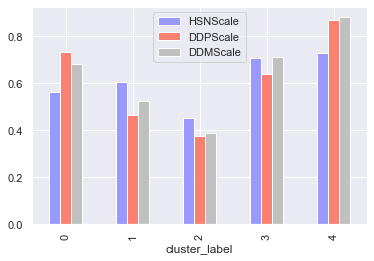

In [541]:
ds.groupby("cluster_label")[["HSNScale","DDPScale","DDMScale"]].mean().plot(kind = 'bar', colors = ['#9999ff', 'salmon', 'silver'])

In [ ]:
plt = ds.groupby("label_psy_only")[["HSNScale","DDPScale","DDNScale","DDMScale"]].mean().plot()

In [10]:
ds.label_psy_only.value_counts()

1    13272
3    11859
0    10648
4     8918
2     7932
Name: label_psy_only, dtype: int64

In [11]:
ds.groupby("label_all_features")[["HSNScale","DDPScale","DDNScale","DDMScale"]].agg('mean')

,HSNScale,DDPScale,DDNScale,DDMScale
label_all_features,,,,
0,0.707655,0.639897,0.769619,0.712948
1,0.562138,0.732254,0.551736,0.681036
2,0.451547,0.375647,0.430796,0.386291
3,0.605083,0.464053,0.618266,0.525562
4,0.728221,0.870250,0.846662,0.883233


In [12]:
ds.label_all_features.value_counts()

3    13268
0    11828
1    10628
4     8943
2     7962
Name: label_all_features, dtype: int64

We can observe that the narcissim scale is consistent between the 2 tests (HSN and DDN). Therefore, I will keep only the more detailed test of the 2 (HSN as it had 10 questions instead of 4 for DDN).

In [13]:
ds.drop(columns="DDNScale",axis=1,inplace=True)

We observe that the clustering has similar results no matter if we take into account only the psychological features or all of them. Therefore I will drop the column label_all_features.

In [14]:
ds.drop("label_all_features",axis=1, inplace=True)

In [15]:
ds.rename(columns={"label_psy_only": "cluster_label"},inplace=True)

In [16]:
ds.country = np.where(ds.country == "US", 0, 1)

In [17]:
ds.country.value_counts()

0    27370
1    25259
Name: country, dtype: int64

In [18]:
ds.country.value_counts()[1]/(ds.country.value_counts()[0]+ds.country.value_counts()[1])

0.4799445172813468

In [80]:
ds.groupby("cluster_label")["HSNScale","DDPScale","DDMScale","age","accuracy","country"].mean()

,HSNScale,DDPScale,DDMScale,age,accuracy,country
cluster_label,,,,,,
0,0.563236,0.733326,0.682612,24.478494,83.094760,0.451728
1,0.604587,0.463687,0.524262,26.637432,81.434298,0.484629
2,0.450368,0.376633,0.386391,30.768785,85.094806,0.448563
3,0.707240,0.638245,0.712598,24.370605,81.267982,0.505102
4,0.728816,0.870464,0.883197,24.075353,88.719107,0.501121


US is over represented for clusters 0 and 2
0 : scoring high for psycopathy only
2: very low scores on 3 tests

non US is overrepresented in clusters 3 and 4:
3: average psycopathy, high narcissim and machivallism
4: highest scores for all 3 tests. It is also worth nothing that this category has the highest accuracy score.

In [20]:
ds.groupby("country")["HSNScale","DDPScale","DDMScale","age","accuracy"].mean()

,HSNScale,DDPScale,DDMScale,age,accuracy
country,,,,,
0,0.612037,0.610027,0.638564,26.530142,84.740117
1,0.622710,0.617018,0.639014,25.172097,82.195574


In [21]:
ds.loc[ds.country == 0].age.mean()

26.53014249177932

In [22]:
ds.loc[ds.country == 1].age.mean()

25.172097074310148

In [23]:
ds.loc[(ds.age > 23)& (ds.age <= 30) ].shape

(10298, 30)

In [24]:
ds.loc[ds.gender == 1][["HSNScale","DDPScale","DDMScale"]].mean()

HSNScale    0.621055
DDPScale    0.648942
DDMScale    0.663108
dtype: float64

In [25]:
ds.loc[ds.gender == 2][["HSNScale","DDPScale","DDMScale"]].mean()

HSNScale    0.610410
DDPScale    0.553059
DDMScale    0.598090
dtype: float64

In [27]:
#pip install python-ternary

In [49]:
%matplotlib inline

import ternary

cols = ['HSNScale', 'DDPScale', 'DDMScale']
for col in cols:
    ds[col[3]] = ds[col] * 100 / ds[cols].sum(axis=1)

In [50]:
ds.head(1)

,HSNS1,HSNS2,HSNS3,HSNS4,HSNS5,HSNS6,HSNS7,HSNS8,HSNS9,HSNS10,DDP1,DDP2,DDP3,DDP4,DDN1,DDN2,DDN3,DDN4,DDM1,DDM2,DDM3,DDM4,age,gender,accuracy,country,HSNScale,cluster_label,DDPScale,DDMScale,H,D,S
0,2,4,5,1,4,5,4,3,3,2,1,1,4,4,2,1,1,1,1,2,2,1,37,2,98,1,0.62,2,0.5,0.3,43.661972,21.126761,21.126761


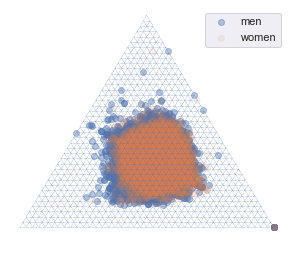

In [534]:
fig, tax = ternary.figure(scale=100)
fig.set_size_inches(5, 4.5)

tax.scatter(ds.loc[ds.gender == 1][['H', 'D', 'S']].values, alpha = 0.40, label='men')
tax.scatter(ds.loc[ds.gender == 2][['H', 'D', 'S']].values, alpha=0.10, label='women')
tax.gridlines(multiple=2.5)
tax.get_axes().axis('off')
plt.legend()

In [75]:
#import plotly.express as px

#df = ds[['HSNScale', 'DDPScale', 'DDMScale']]
#fig = px.scatter_ternary(df, a="HSNScale", b="DDPScale", c="DDMScale")
#fig.show()



In [168]:
#importing libraries
from scipy import stats
from scipy.stats import ttest_1samp
import statsmodels
from scipy.stats import t
from statsmodels.stats.proportion import proportions_ztest
import seaborn as sns
from scipy.stats import ttest_1samp, ttest_rel, ttest_ind
from scipy.stats import f_oneway

## STATISTICS

## Hypothesis 1 

US and non-US participant have the same average score on their pyscologocial test.

In [169]:
def t_test_features(s1, s2, features=['HSNScale', 'DDPScale', 'DDMScale', 'age', 'accuracy']):
 
  
    result = {key : ttest_ind(s1[key],s2[key])for key in features}

    return result

In [170]:
t_test_features(ds.loc[ds.country == 0],ds.loc[ds.country == 1]) #[1]

{'HSNScale': Ttest_indResult(statistic=-9.798557004510625, pvalue=1.1941957941133548e-22),
 'DDPScale': Ttest_indResult(statistic=-3.9056875950835424, pvalue=9.407507521588545e-05),
 'DDMScale': Ttest_indResult(statistic=-0.2548244977718423, pvalue=0.7988596489679297),
 'age': Ttest_indResult(statistic=14.492424795992143, pvalue=1.6705831232306302e-47),
 'accuracy': Ttest_indResult(statistic=18.188963308840723, pvalue=1.0627118441803352e-73)}

US and non-US population have significantly different stats when it come to Narcissim ad Psychopathy, but not for Machiavellism.

## Hypothesis 2 

Men and women have the same average score on their pyscologocial test.

In [171]:
#1 =Male 2= Female
t_test_features(ds.loc[ds.gender == 1],ds.loc[ds.gender == 2])

{'HSNScale': Ttest_indResult(statistic=9.426568469431212, pvalue=4.404183760120639e-21),
 'DDPScale': Ttest_indResult(statistic=53.072352063912874, pvalue=0.0),
 'DDMScale': Ttest_indResult(statistic=35.98683918499269, pvalue=3.692643649653672e-280),
 'age': Ttest_indResult(statistic=2.8665380468452515, pvalue=0.004151542842978249),
 'accuracy': Ttest_indResult(statistic=-1.3933113112116264, pvalue=0.16353160754699325)}

In [172]:
#we can reject the hypo

In [194]:
filt =ds.loc[ds.gender == 2]
print(filt.DDPScale.mean())
filt2 = ds.loc[ds.gender == 1]
print(filt2.DDPScale.mean())

0.5530586606501938
0.6489424872210903


## Hypothesis 3

People under 25 score higher for narcissim, psycopathy and machiavellism.

In [173]:
#t_test_rel ou t_test_1 samp?
#porportional
t_test_features(ds.loc[ds.age<25], ds.loc[ds.age >= 25])

{'HSNScale': Ttest_indResult(statistic=23.986361387438063, pvalue=1.848742831069617e-126),
 'DDPScale': Ttest_indResult(statistic=32.3657783730091, pvalue=1.4415405898524627e-227),
 'DDMScale': Ttest_indResult(statistic=25.440027073156767, pvalue=6.590618143835112e-142),
 'age': Ttest_indResult(statistic=-281.95332282991495, pvalue=0.0),
 'accuracy': Ttest_indResult(statistic=-6.839433780879505, pvalue=8.037243464963615e-12)}

hypothesis test that will determine whether the psycopathy score for people under 21 is significantly different from 25% at the 95% confidence level.

In [ ]:
Hypothesis Tests of Proportions

Another type of one sample test is a hypothesis test of proportions. In this test, we examine whether the proportion of a group in our sample is significantly different than a fraction.

You can read more about one sample proportion tests here.

In the cell below, use the proportions_ztest function from statsmodels to perform a hypothesis test that will determine whether the number of hourly workers in the City of Chicago is significantly different from 25% at the 95% confidence level.
In [26]:

# Your code here:
from statsmodels.stats.proportion import proportions_ztest

proportions_ztest(salaries[salaries['Salary or Hourly'] == 'Hourly'].shape[0],salaries.shape[0], value = 0.25) 

#-3.5 is far below -1.96, which would be the critival lower value for the 95% CI. 

#Therefore, the number of hourly workers is lower than 25%


Younger people indeed score higher.

## Multiclass classification

In [496]:
ds_binned = ds.copy()

In [497]:
ds_binned["age_bins"] = pd.cut(ds_binned.age, bins=[0,18,22.5,99])

In [498]:
ds_binned.age_bins.value_counts()

(22.5, 99.0]    25413
(0.0, 18.0]     14065
(18.0, 22.5]    13151
Name: age_bins, dtype: int64

In [499]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, precision_score, recall_score, accuracy_score
from sklearn import preprocessing

In [500]:
bins= list(ds_binned.age_bins.value_counts().index)
bins

[Interval(22.5, 99.0, closed='right'),
 Interval(0.0, 18.0, closed='right'),
 Interval(18.0, 22.5, closed='right')]

In [501]:
le = preprocessing.LabelEncoder()

trans = list(le.fit_transform(bins))

encoded = dict(zip(bins,trans))

ds_binned["age_encoded"]= ds_binned.age_bins.map(encoded)

In [502]:
ds_binned.head(1)

,HSNS1,HSNS2,HSNS3,HSNS4,HSNS5,HSNS6,HSNS7,HSNS8,HSNS9,HSNS10,DDP1,DDP2,DDP3,DDP4,DDN1,DDN2,DDN3,DDN4,DDM1,DDM2,DDM3,DDM4,age,gender,accuracy,country,HSNScale,cluster_label,DDPScale,DDMScale,H,D,S,age_bins,age_encoded
0,2,4,5,1,4,5,4,3,3,2,1,1,4,4,2,1,1,1,1,2,2,1,37,2,98,1,0.62,2,0.5,0.3,43.661972,21.126761,21.126761,"(22.5, 99.0]",2


In [503]:
ds_binned.age_encoded.value_counts(0)

2    25413
0    14065
1    13151
Name: age_encoded, dtype: int64

In [504]:
msk = np.random.rand(len(ds_binned)) < 0.975

train = ds_binned[msk]

test = ds_binned[~msk]

In [505]:
X_test = test.drop(columns=["age",'gender','accuracy','country','cluster_label','H',"D",'S','age_bins','age_encoded'],axis=1)
y_test = test.age_encoded

In [506]:
train.age_encoded.value_counts()

2    24786
0    13710
1    12781
Name: age_encoded, dtype: int64

In [509]:
from sklearn.utils import resample

ds_majority=train.loc[train.age_encoded == 2]
ds_minority = train.loc[train.age_encoded != 2]


ds_majority_downsampled = resample(ds_majority,
                                replace=False,
                                n_samples=13145,
                                random_state=67)

ds_train = pd.concat([ds_majority_downsampled,ds_minority])


# Display new class counts
print (ds_train.age_encoded.value_counts())


0    13710
2    13145
1    12781
Name: age_encoded, dtype: int64


In [510]:

X_train = ds_train.drop(columns=["age",'gender','accuracy','country','cluster_label','H',"D",'S','age_bins','age_encoded'],axis=1)
y_train = ds_train.age_encoded

KNN

In [511]:
from sklearn.neighbors import KNeighborsClassifier

In [516]:

knn = KNeighborsClassifier(n_neighbors = 9)  

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [517]:
ac = accuracy_score(y_test, y_pred)
ac

0.4245562130177515

In [357]:
ac = accuracy_score(y_test, y_pred)
ac

0.6311399443929564

In [313]:
k_range=range(3,29)
scores=[]

In [314]:
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_res,y_train_res)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test,y_pred))

Text(0, 0.5, 'Testing accuracy')

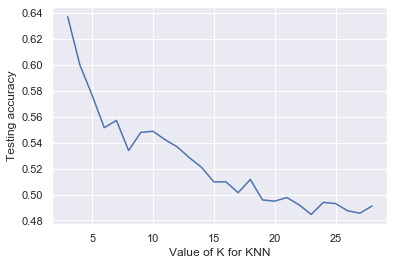

In [315]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(k_range, scores)
plt.xlabel("Value of K for KNN")
plt.ylabel("Testing accuracy")